# Proyek Analisis Data: [Bike Sharing]
- **Nama:** Vasya Ayu Karmina
- **Email:** vasyakarmina@gmail.com
- **ID Dicoding:** vasyaayu

## Menentukan Pertanyaan Bisnis

- Apakah terdapat perbedaan pola penggunaan sepeda antara hari libur dan hari kerja?
- Apakah musim mempengaruhi jumlah penyewaan sepeda?
- Bagaimana pola pertumbuhan penyewaan sepeda dari tahun ke tahun?
- Bagaimana kelompok suhu yang berbeda berdampak pada jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt
import matplotlib.dates as mdates

## Data Wrangling

### Dataset Information

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.
Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.
Attribute Information:
*   instant: record index
*   dteday : date
*   season : season (1:springer, 2:summer, 3:fall, 4:winter)
*   yr : year (0: 2011, 1:2012)
*   mnth : month ( 1 to 12)
*   hr : hour (0 to 23)
*   holiday : weather day is holiday or not (extracted from [Web Link])
*   weekday : day of the week
*   workingday : if day is neither weekend nor holiday is 1, otherwise is 0
*   weathersit :
*   1: Clear, Few clouds, Partly cloudy, Partly cloudy
*   2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
*   3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
*   4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
*   temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
*   atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
*   hum: Normalized humidity. The values are divided to 100 (max)
*   windspeed: Normalized wind speed. The values are divided to 67 (max)
*   casual: count of casual users
*   registered: count of registered users
*   cnt: count of total rental bikes including both casual and registered



### Gathering Data

Pertama, kita akan melakukan load dataset. Terdapat 2 dataset, yaitu day dan hour. Disni digunakan dataset hour karena lebih rinci.

In [82]:
# Melakukan load dataset bike-sharing (hour)
bs = pd.read_csv('https://raw.githubusercontent.com/vasyaayu/Data-Analytics-bike-sharing/a05db24b2ee4567b3256478d27ecffb4e6abc170/data/hour.csv')
bs.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Assessing Data

#### Data Type Check

In [83]:
# Memeriksa tipe data bike-sharing (hour)
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Tipe data kolom "dteday" pada dataset tersebut masih kurang tepat untuk digunakan dalam analisis data sehingga perlu diubah ke tipe data datetime.

#### Missing Value Check

In [84]:
bs.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dalam dataset tidak ditemukan adanya missing value.

#### Data Duplicate Check

In [85]:
bs_duplicate = bs.duplicated().sum()
print("Jumlah baris yang memiliki data sama: {} baris".format(bs_duplicate))

Jumlah baris yang memiliki data sama: 0 baris


Dalam dataset tidak ditemukan adanya baris yang terduplikat.

#### Data Statistic Check

In [86]:
bs.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan tabel di atas, statistik pada dataset terlihat normal.

### Cleaning Data

Berdasarkan pengecekan tipe data pada tahap assessing data, kolom dengan tipe data float akan diubah menjadi integer. Sementara itu, kolom dengan tipe data object yang berisi tanggal akan diubah menjadi datetime. bsn adalah dataframe dengan beberapa kolom yang diubah menjadi kategorikal sedangkan bs adalah dataframe dengan kolom numerikal.

##### Datetime Formatting

In [87]:
bsn = bs.copy()
bsn['dteday'] = pd.to_datetime(bsn['dteday'], format='%Y-%m-%d')
bsn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### Customize Data with Time Descriptions

Dalam dataset tersebut, terdapat beberapa data yang menunjukkan keterangan waktu yang masih dituliskan dengan angka (int), seperti yr, season, mnth, dan weekday. Data tersebut perlu diubah menjadi string untuk memudahkan pembacaan data nantinya saat divisualisasikan

In [88]:
# yr (year)
bsn['yr'] = bsn['dteday'].dt.year

In [89]:
# season
season_mapping = {1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'}
bsn['season'] = bsn['season'].replace(season_mapping)

In [90]:
# mnth (month)
bsn['mnth'] = bsn['dteday'].dt.month_name()

In [91]:
# weekday
bsn['weekday'] = bsn['dteday'].dt.day_name()

In [92]:
bsn.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Returns Data to Before Normalization

In [93]:
min_temp, max_temp = -8, 39
bsn['temp'] = bsn['temp'] * (max_temp - min_temp) + min_temp

## Exploratory Data Analysis (EDA)

### Descriptive Statistics

In [94]:
# workingday
bs_season = bsn.replace({'workingday': {0: 'Weekend', 1: 'Weekday'}}).groupby('workingday')['cnt'].describe()
print(bs_season)

              count        mean         std  min   25%    50%    75%    max
workingday                                                                 
Weekday     11865.0  193.207754  185.107477  1.0  40.0  151.0  277.0  977.0
Weekend      5514.0  181.405332  172.853832  1.0  40.0  119.0  292.0  783.0


In [95]:
stats_workingday = bsn.replace({'workingday': {0: 'Weekend', 1: 'Weekday'}}).groupby('workingday').agg({
    'registered': 'sum',
    'casual': 'sum',
    'cnt': 'sum'
})
print(stats_workingday)

            registered  casual      cnt
workingday                             
Weekday        1989125  303285  2292410
Weekend         683537  316732  1000269


In [96]:
# season
bs_season = bsn.groupby('season')['cnt'].describe()
print(bs_season)

           count        mean         std  min   25%    50%    75%    max
season                                                                  
fall      4496.0  236.016237  197.711630  1.0  68.0  199.0  345.0  977.0
springer  4242.0  111.114569  119.224010  1.0  23.0   76.0  158.0  801.0
summer    4409.0  208.344069  188.362473  1.0  46.0  165.0  311.0  957.0
winter    4232.0  198.868856  182.967972  1.0  46.0  155.5  295.0  967.0


In [97]:
stats_season = bsn.groupby('season').agg({
    'registered': 'sum',
    'casual': 'sum',
    'cnt': 'sum'
})
print(stats_season)

          registered  casual      cnt
season                               
fall          835038  226091  1061129
springer      410726   60622   471348
summer        715067  203522   918589
winter        711831  129782   841613


In [98]:
# temp
bs_temp = bsn.groupby('temp')['cnt'].describe()
print(bs_temp)

        count        mean         std    min     25%    50%     75%    max
temp                                                                      
-7.06    17.0   41.882353   80.875585    1.0    2.00    8.0   27.00  315.0
-6.12    16.0   35.625000   57.779898    1.0    3.00   12.5   34.75  180.0
-5.18    16.0   42.000000   30.583220    2.0   20.50   36.5   63.25  102.0
-4.24    17.0   28.235294   27.019737    1.0    4.00   24.0   46.00   84.0
-3.30    51.0   49.294118   74.691979    1.0    7.50   22.0   65.50  417.0
-2.36    76.0   58.421053   70.434700    1.0    6.75   34.0   92.50  423.0
-1.42   138.0   55.108696   61.825713    1.0    8.00   30.0   83.75  245.0
-0.48   230.0   65.578261   73.083074    1.0   13.00   46.5   88.75  501.0
 0.46   155.0   60.116129   65.678967    1.0   15.50   50.0   77.00  471.0
 1.40   354.0   79.745763  101.825590    1.0   10.00   50.0  104.75  679.0
 2.34   421.0   69.914489   93.249396    1.0   10.00   41.0   86.00  729.0
 3.28   522.0   80.159004

Statistika data pada variabel workingday dan season terlihat cukup normal.

### Histogram

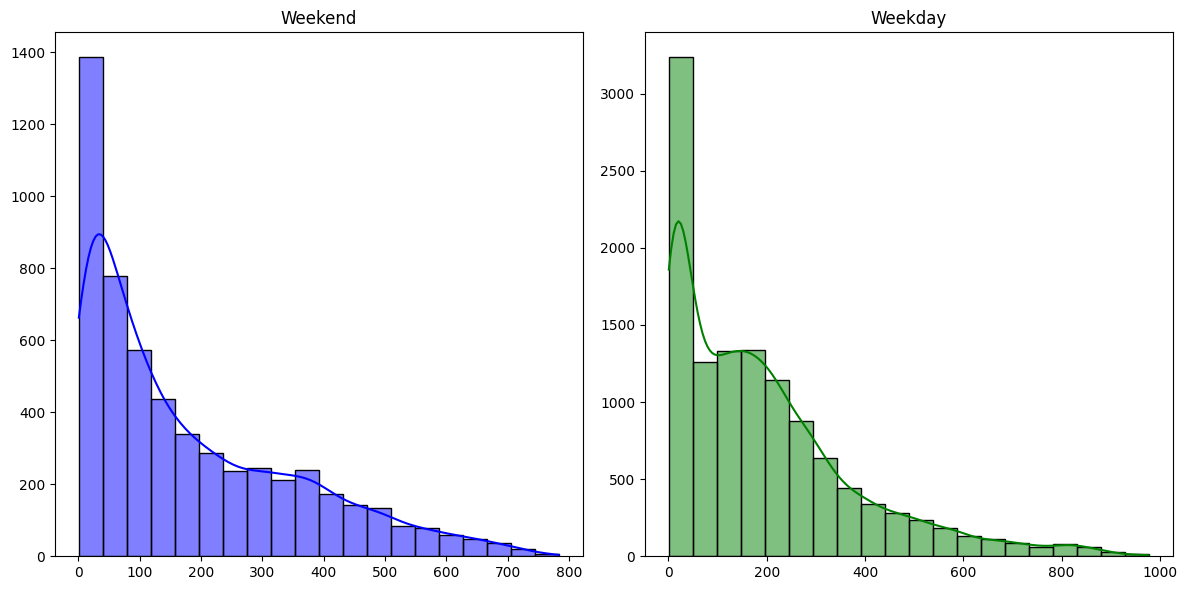

In [99]:
# histogram workingday
holiday_data = bsn[bsn['workingday'] == 0]
workday_data = bsn[bsn['workingday'] == 1]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=holiday_data, x='cnt', kde=True, color='blue', bins=20)
plt.title('Weekend')
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(1, 2, 2)
sns.histplot(data=workday_data, x='cnt', kde=True, color='green', bins=20)
plt.title('Weekday')
plt.xlabel(None)
plt.ylabel(None)

plt.tight_layout()
plt.show()

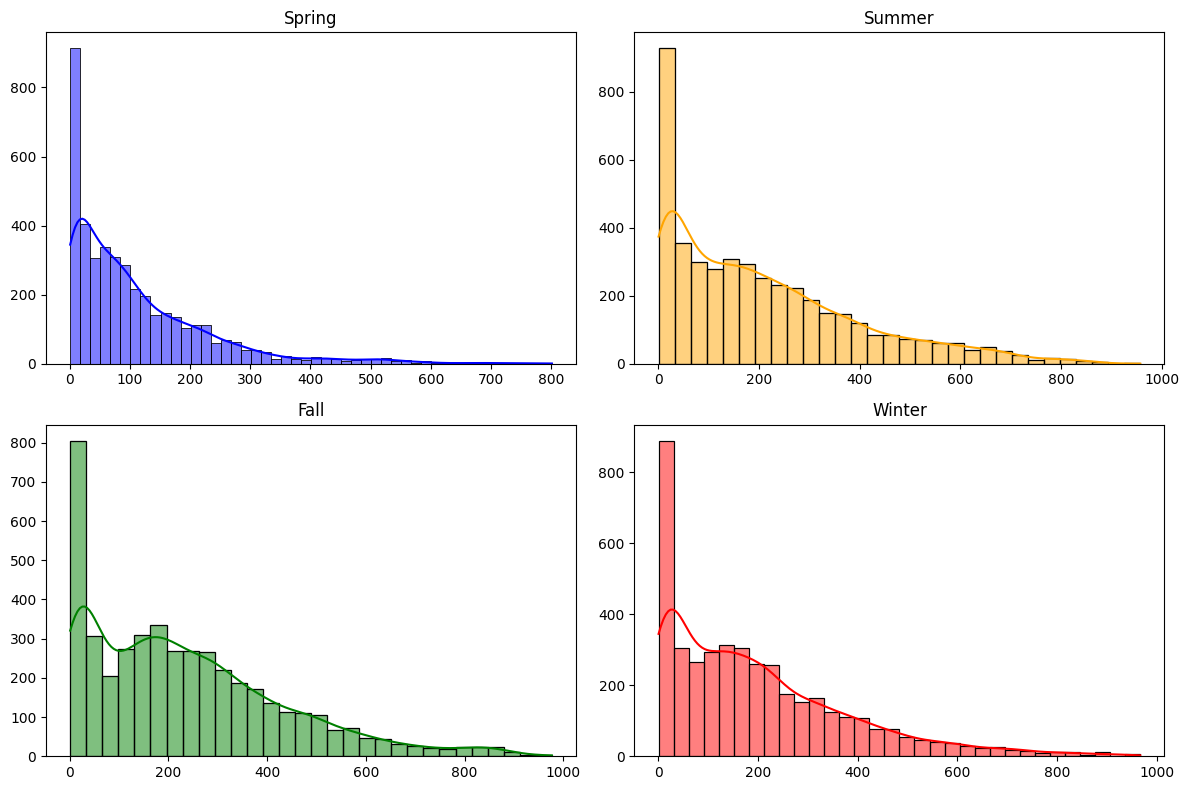

In [100]:
# histogram season
plt.figure(figsize=(12, 8))

spring_data = bsn[bsn['season'] == 'springer']
summer_data = bsn[bsn['season'] == 'summer']
fall_data = bsn[bsn['season'] == 'fall']
winter_data = bsn[bsn['season'] == 'winter']

plt.subplot(2, 2, 1)
sns.histplot(data=spring_data, x='cnt', kde=True, color='blue')
plt.title('Spring')
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(2, 2, 2)
sns.histplot(data=summer_data, x='cnt', kde=True, color='orange')
plt.title('Summer')
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(2, 2, 3)
sns.histplot(data=fall_data, x='cnt', kde=True, color='green')
plt.title('Fall')
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(2, 2, 4)
sns.histplot(data=winter_data, x='cnt', kde=True, color='red')
plt.title('Winter')
plt.xlabel(None)
plt.ylabel(None)

plt.tight_layout()
plt.show()

*   Berdasarkan bentuk histogram, data pada keda variabel cenderung tidak terdistribusi dengan normal dan menunjukkan bentuk right skewed (positively skewed)
*   Ada lebih banyak penyewaan sepeda pada hari kerja dibandingkan hari libur. Hal ini terlihat dari tinggi batang histogram yang lebih tinggi pada hari kerja. Akan tetapi, ada beberapa waktu juga dimana penyewaan sepeda lebih tinggi pada hari libur
*   Distribusi penyewaan sepeda pada hari kerja lebih merata dibandingkan hari libur. Hal ini terlihat dari bentuk histogram yang lebih simetris pada hari kerja.




### Boxplot

<ipython-input-101-aae895aedbd7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bsn, x='workingday', y='cnt', palette='colorblind')


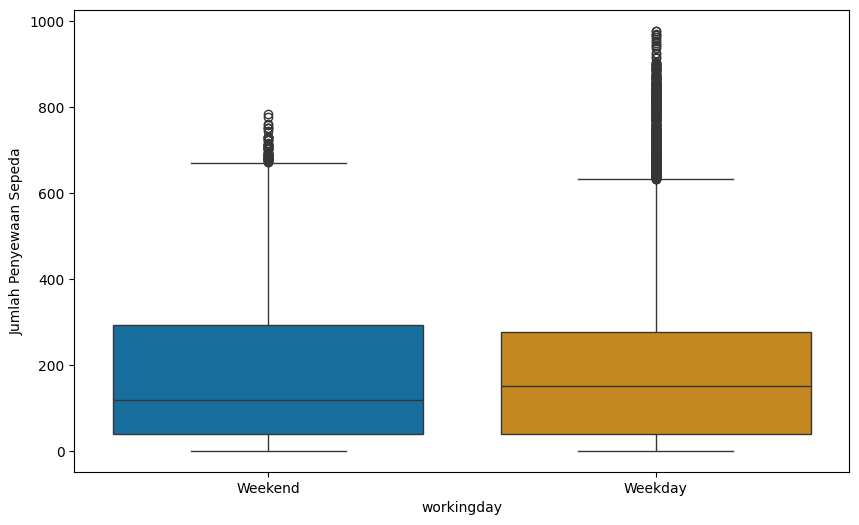

In [101]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=bsn, x='workingday', y='cnt', palette='colorblind')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks([0, 1], ['Weekend', 'Weekday'])
plt.show()

<ipython-input-102-ac7039fd886a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bsn, x='season', y='cnt', palette='colorblind')


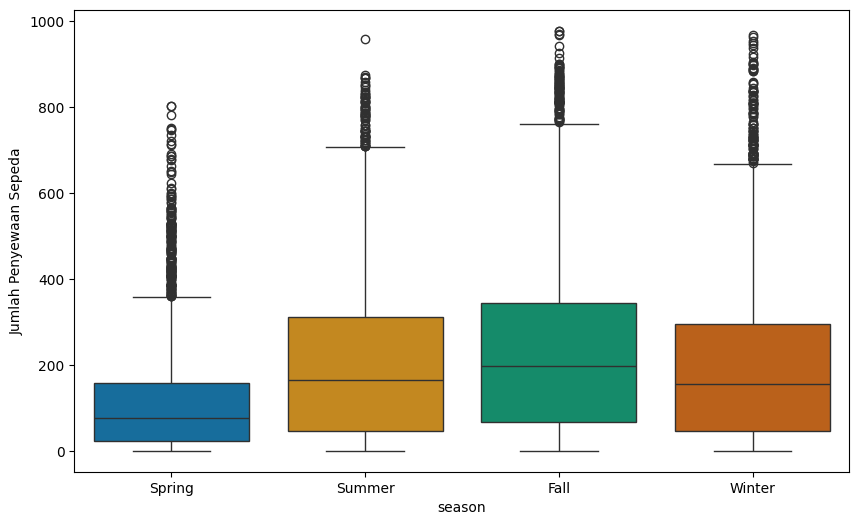

In [102]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=bsn, x='season', y='cnt', palette='colorblind')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

*   Dalam setiap boxplot ditemukan nilai outlier. Namun, nilai outlier tersebut tidak akan dihapus karena kemungkinan mewakili situasi saat terjadi lonjakan jumlah peminat penyewaan sepeda
*   Pada variabel workingday, terjadi lebih banyak penyewaan sepeda pada hari kerja dibandingkan hari libur
*   Pada variabel season, terjadi lebih banyak penyewaan sepeda pada musim gugur sedangkan musim semi adalah sebaliknya





### Time Series of Bike Sharing


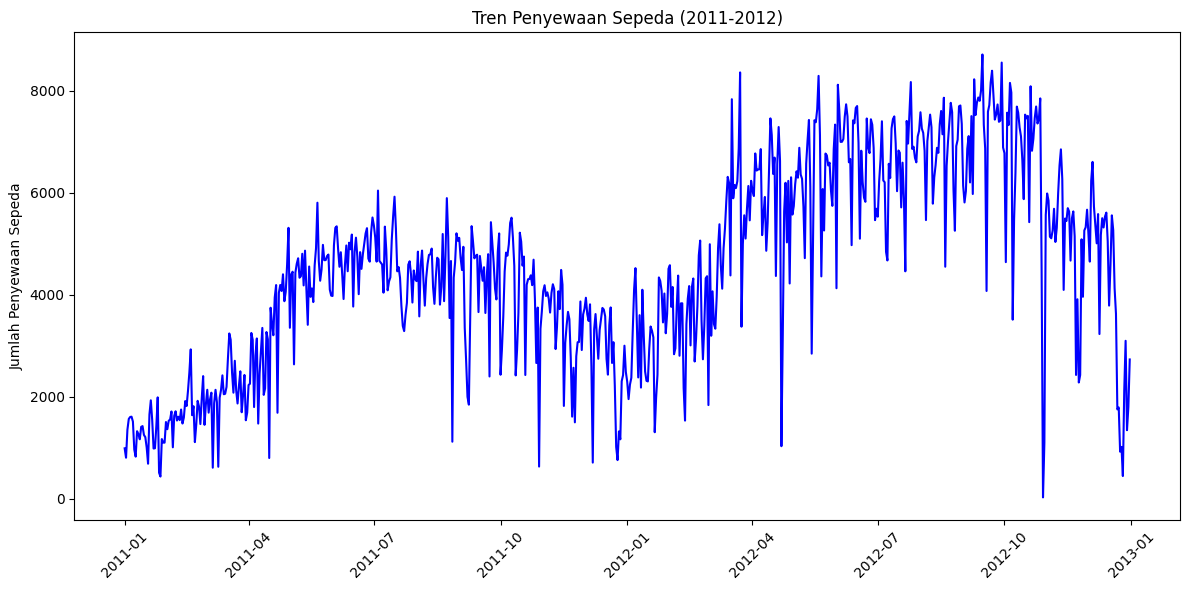

In [103]:
daily_bs = bsn.groupby('dteday')['cnt'].sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_bs.index, daily_bs.values, color='blue', linestyle='-')
plt.title('Tren Penyewaan Sepeda (2011-2012)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*   Pada tahun 2012 jumlah pengguna dari penyewaan sepeda terlihat lebih tinggi dibandingkan tahun 2011
*   Setiap awal tahun jumlah pengguna penyewaan sepeda terus meningkat tetapi setelah pertengahan tahun cenderung menurun

### Correlation

In [104]:
correlation = bs.corr()
correlation_dependent = correlation['cnt'].sort_values(ascending=False)
print(correlation_dependent)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64


<ipython-input-104-23b3a085d6c1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = bs.corr()


<ipython-input-105-8374cffd4fd4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = bs.corr()


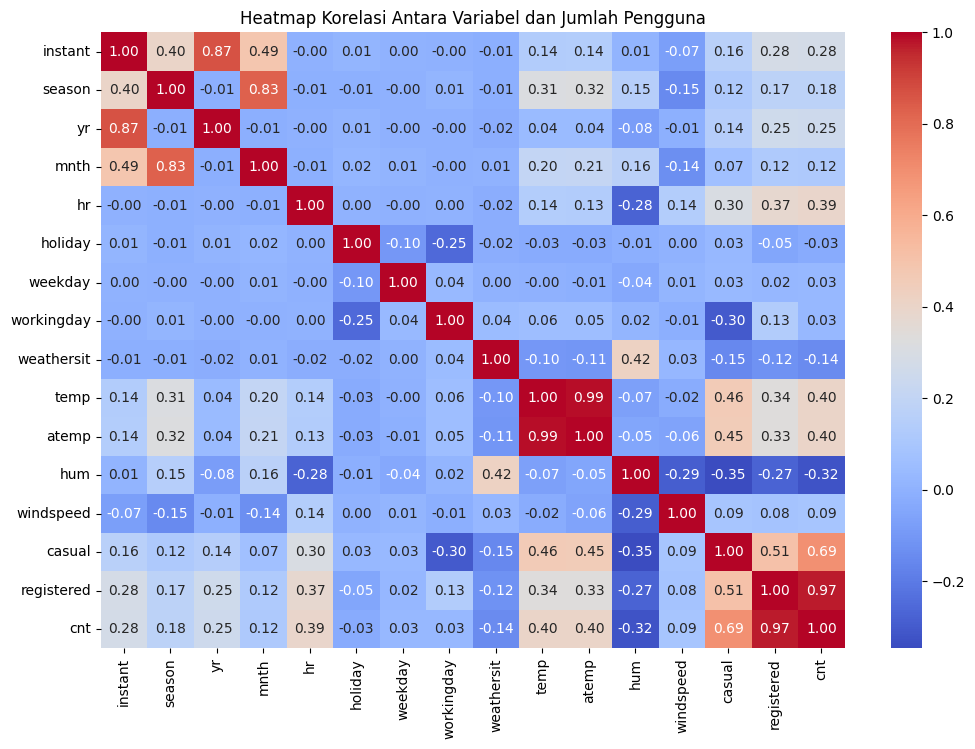

In [105]:
plt.figure(figsize=(12, 8))
correlation_matrix = bs.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antara Variabel dan Jumlah Pengguna')
plt.show()

*   Berdasarkan variabel dependen (cnt), korelasi tertinggi terdapat pada variabel temp dengan nilai 0.4. Sementara itu, korelasi terendah terjadi pada variabel hum
*   Variabel season hanya memiliki korelasi sebedar 0.18 menunjukkan adanya hubungan positif yang lemah

### Clustering by Temperature

In [106]:
cold_days = bsn[bsn['temp'] < 10]
cool_days = bsn[(bsn['temp'] >= 10) & (bsn['temp'] < 20)]
warm_days = bsn[(bsn['temp'] >= 20) & (bsn['temp'] < 30)]
hot_days = bsn[bsn['temp'] >= 30]

total_bs_cold_days = cold_days['cnt'].sum()
total_bs_cool_days = cool_days['cnt'].sum()
total_bs_warm_days = warm_days['cnt'].sum()
total_bs_hot_days = hot_days['cnt'].sum()

print("Jumlah penyewaan sepeda pada hari-hari dingin:", total_bs_cold_days)
print("Jumlah penyewaan sepeda pada hari-hari sejuk:", total_bs_cool_days)
print("Jumlah penyewaan sepeda pada hari-hari hangat:", total_bs_warm_days)
print("Jumlah penyewaan sepeda pada hari-hari panas:", total_bs_hot_days)

Jumlah penyewaan sepeda pada hari-hari dingin: 626084
Jumlah penyewaan sepeda pada hari-hari sejuk: 949036
Jumlah penyewaan sepeda pada hari-hari hangat: 1486229
Jumlah penyewaan sepeda pada hari-hari panas: 231330


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah terdapat perbedaan dalam penyewaan sepeda antara hari libur dan hari kerja?

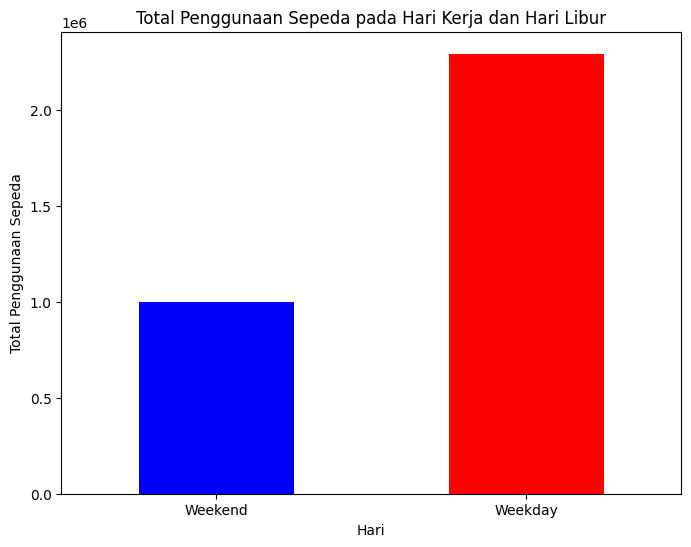

In [107]:
bs_by_day = bs.groupby('workingday')['cnt'].sum()
plt.figure(figsize=(8, 6))
bs_by_day.plot(kind='bar', color=['blue', 'red'])
plt.title('Total Penggunaan Sepeda pada Hari Kerja dan Hari Libur')
plt.xlabel('Hari')
plt.ylabel('Total Penggunaan Sepeda')
plt.xticks([0, 1], ['Weekend', 'Weekday'], rotation=0)
plt.show()

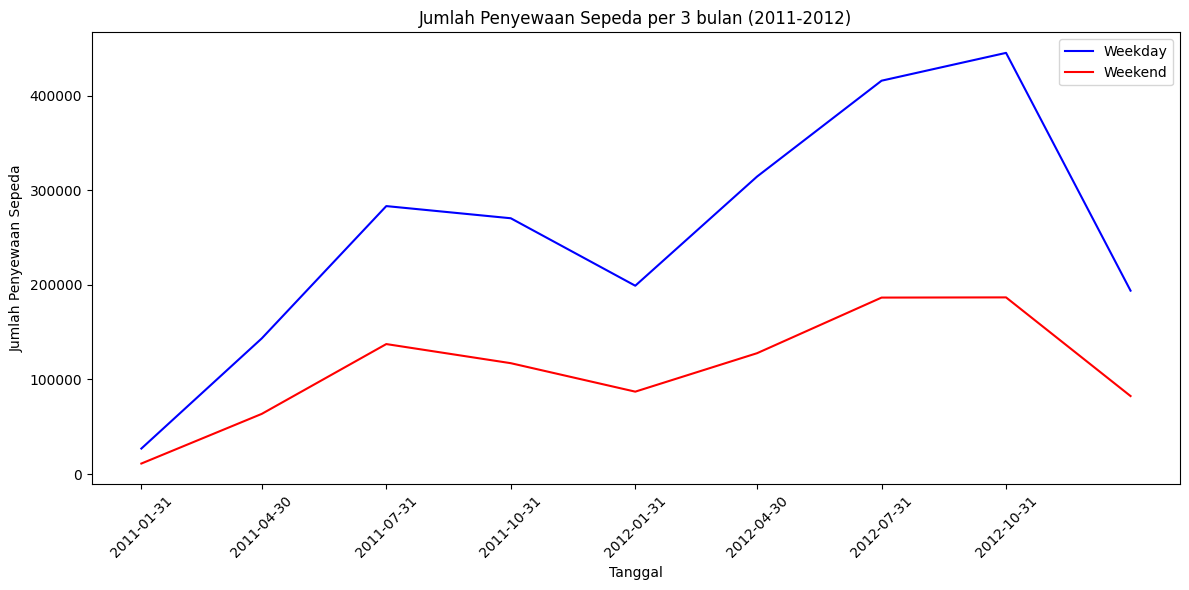

In [108]:
xticks = pd.date_range(start=bsn['dteday'].min(), end=bsn['dteday'].max(), freq='3M')

weekday_bs = bsn[bsn['workingday'] == 1]
weekend_bs = bsn[bsn['workingday'] == 0]

weekday_users = weekday_bs.groupby('dteday')['cnt'].sum()
weekend_users = weekend_bs.groupby('dteday')['cnt'].sum()

weekday_3m = weekday_users.resample('3M').sum()
weekend_3m = weekend_users.resample('3M').sum()

plt.figure(figsize=(12, 6))
plt.plot(weekday_3m.index, weekday_3m.values, color='blue', linestyle='-', label='Weekday')
plt.plot(weekend_3m.index, weekend_3m.values, color='red', linestyle='-', label='Weekend')
plt.title('Jumlah Penyewaan Sepeda per 3 bulan (2011-2012)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(xticks, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

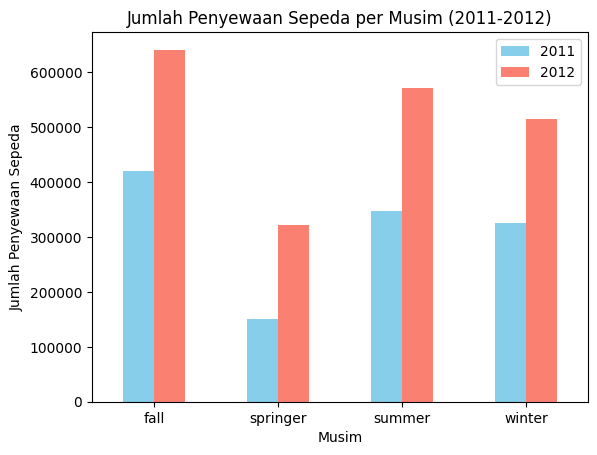

In [109]:
seasonal_bs = bsn.groupby(['season', 'yr'])['cnt'].sum().unstack()

plt.figure(figsize=(10, 6))
seasonal_bs.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Jumlah Penyewaan Sepeda per Musim (2011-2012)')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(rotation=0)
plt.legend(['2011', '2012'])
plt.show()

### Pertanyaan 2: Apakah musim mempengaruhi jumlah penyewaan sepeda?

In [110]:
correlation_season_cnt = bs[['season', 'cnt']].corr()
print(correlation_season_cnt)

          season       cnt
season  1.000000  0.178056
cnt     0.178056  1.000000


<Figure size 800x600 with 0 Axes>

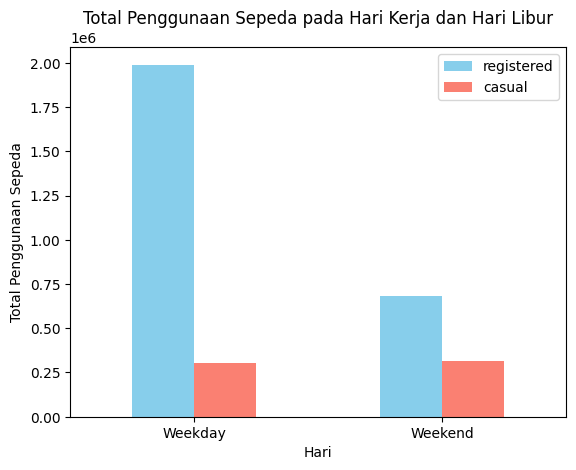

In [111]:
plt.figure(figsize=(8, 6))
stats_workingday[['registered', 'casual']].plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Total Penggunaan Sepeda pada Hari Kerja dan Hari Libur')
plt.xlabel('Hari')
plt.ylabel('Total Penggunaan Sepeda')
plt.xticks(rotation=0)
plt.show()

### Pertanyaan 3: Bagaimana pola pertumbuhan penyewaan sepeda dari tahun ke tahun?

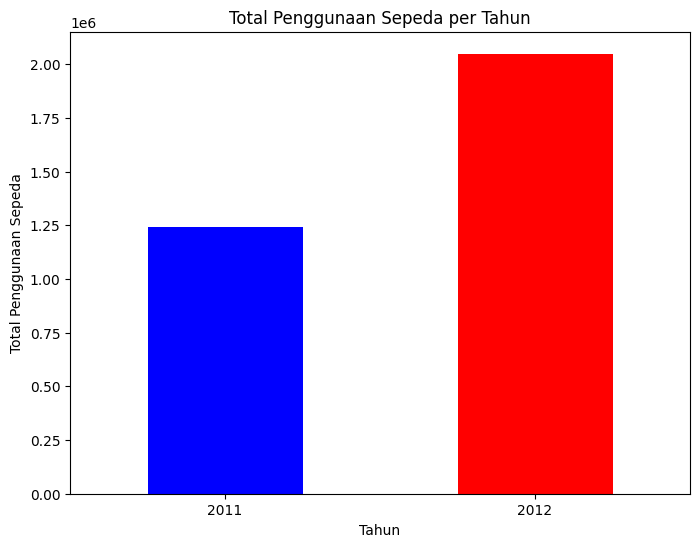

In [112]:
rentals_by_year = bs.groupby('yr')['cnt'].sum()

plt.figure(figsize=(8, 6))
rentals_by_year.plot(kind='bar', color=['blue', 'red'])
plt.title('Total Penggunaan Sepeda per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Penggunaan Sepeda')
plt.xticks([0, 1], ['2011', '2012'], rotation=0)
plt.show()

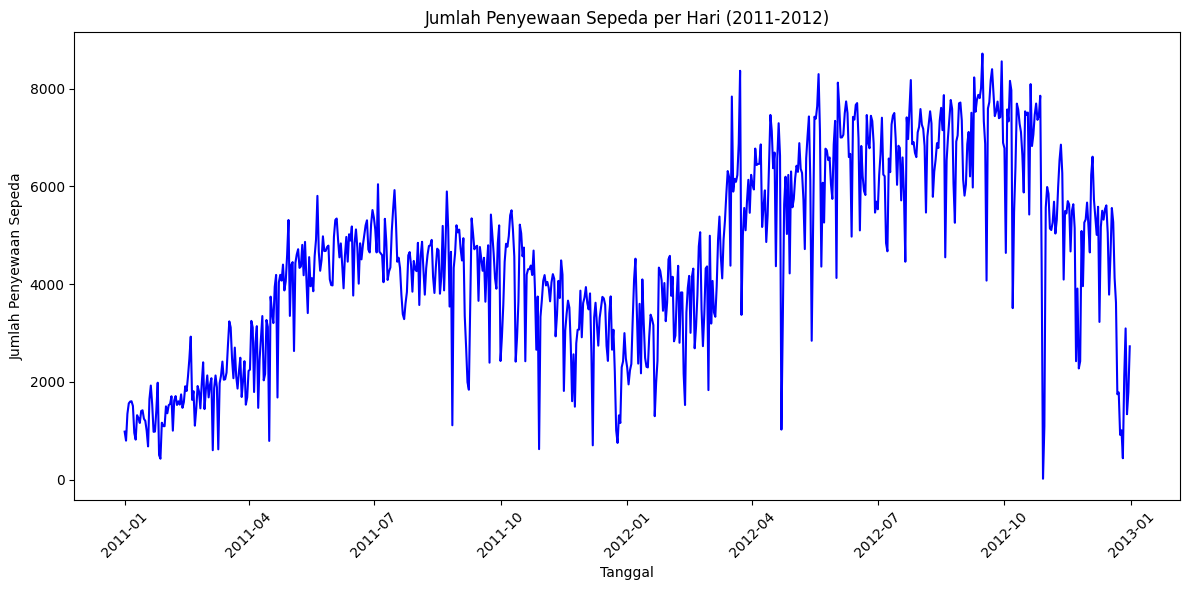

In [113]:
daily_bs = bsn.groupby('dteday')['cnt'].sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_bs.index, daily_bs.values, color='blue', linestyle='-')
plt.title('Jumlah Penyewaan Sepeda per Hari (2011-2012)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [114]:
monthly_bs = bsn.resample('M', on='dteday')['cnt'].sum()
monthly_bs.index = monthly_bs.index.strftime('%Y-%m')
monthly_bs = monthly_bs.reset_index()
monthly_bs.rename(columns={"dteday": "month", "cnt": "total"}, inplace=True)
monthly_bs.head()

,month,total
0,2011-01,38189
1,2011-02,48215
2,2011-03,64045
3,2011-04,94870
4,2011-05,135821


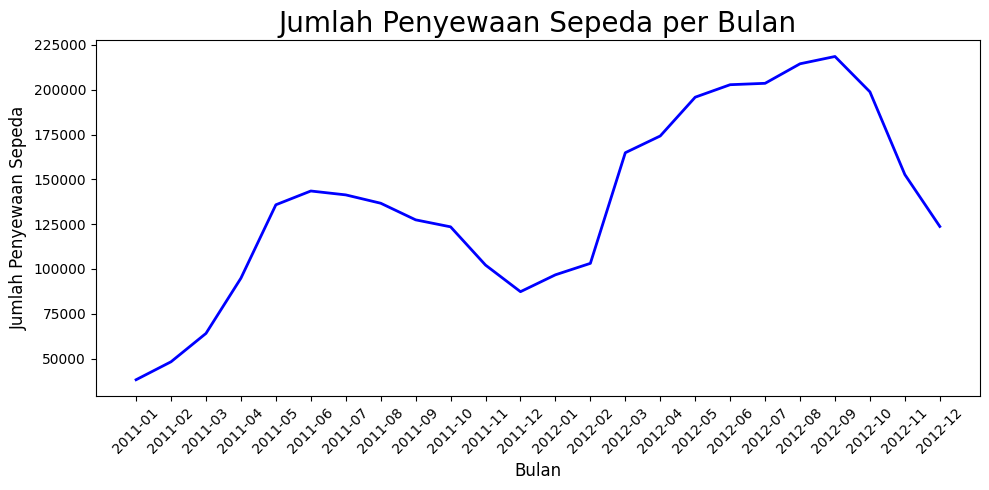

In [115]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_bs["month"], monthly_bs["total"], linewidth=2, color='blue')
plt.title("Jumlah Penyewaan Sepeda per Bulan", loc="center", fontsize=20)
plt.xticks(rotation=45, fontsize=10)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Penyewaan Sepeda", fontsize=12)
plt.tight_layout()
plt.show()

### Pertanyaan 4: Bagaimana kelompok suhu yang berbeda berdampak pada jumlah penyewaan sepeda?

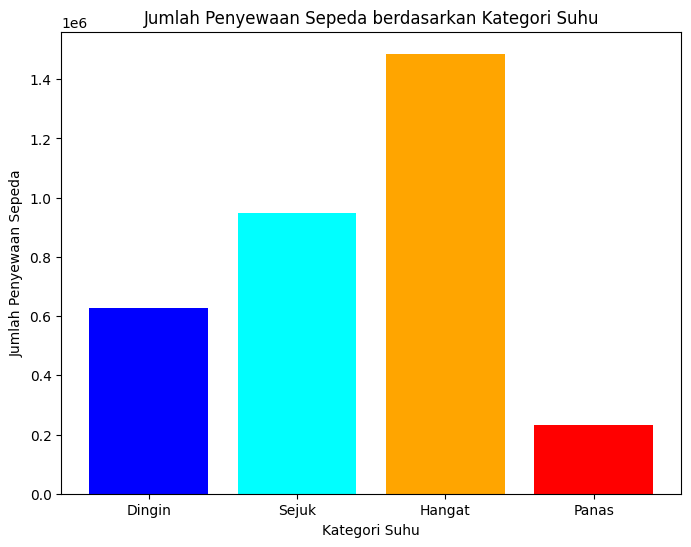

In [116]:
temperature_categories = ['Dingin', 'Sejuk', 'Hangat', 'Panas']
total_bs = [total_bs_cold_days, total_bs_cool_days, total_bs_warm_days, total_bs_hot_days]

plt.figure(figsize=(8, 6))
plt.bar(temperature_categories, total_bs, color=['blue', 'cyan', 'orange', 'red'])
plt.title('Jumlah Penyewaan Sepeda berdasarkan Kategori Suhu')
plt.xlabel('Kategori Suhu')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

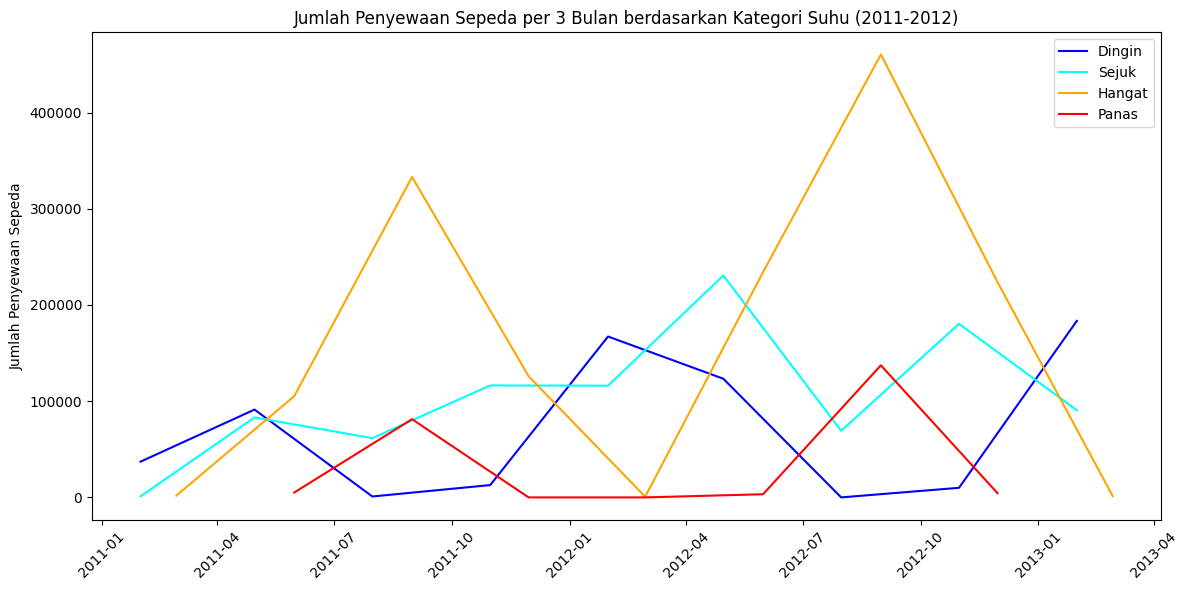

In [117]:
total_cold_3m = cold_days.groupby(pd.Grouper(freq='3M', key='dteday'))['cnt'].sum()
total_cool_3m = cool_days.groupby(pd.Grouper(freq='3M', key='dteday'))['cnt'].sum()
total_warm_3m = warm_days.groupby(pd.Grouper(freq='3M', key='dteday'))['cnt'].sum()
total_hot_3m = hot_days.groupby(pd.Grouper(freq='3M', key='dteday'))['cnt'].sum()

plt.figure(figsize=(12, 6))
plt.plot(total_cold_3m.index, total_cold_3m.values, color='blue', linestyle='-', label='Dingin')
plt.plot(total_cool_3m.index, total_cool_3m.values, color='cyan', linestyle='-', label='Sejuk')
plt.plot(total_warm_3m.index, total_warm_3m.values, color='orange', linestyle='-', label='Hangat')
plt.plot(total_hot_3m.index, total_hot_3m.values, color='red', linestyle='-', label='Panas')

plt.title('Jumlah Penyewaan Sepeda per 3 Bulan berdasarkan Kategori Suhu (2011-2012)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Penyewaan sepeda cenderung lebih tinggi saat kondisi suhu hangat sedangkan lebih rendah saat kondisi suhu panas

## Conclusion

### Pertanyaan 1: Apakah terdapat perbedaan pola penggunaan sepeda antara hari libur dan hari kerja?

*   Sejak tahun 2011, jumlah pengguna penyewaan sepeda lebih dominan pada hari kerja (weekday)
*   Pengguna terdaftar (registered) lebih sering menggunakan layanan penyewaan sepeda saat weekday daripada saat weekend. Sebaliknya, pengguna biasa (casual) lebih sering menggunakan penyewaan sepeda pada saat hari libur (weekend)

### Pertanyaan 2: Apakah musim mempengaruhi jumlah penyewaan sepeda?

Berdasarkan nilai korelasi, terdapat korelasi antara musim dengan jumlah penyewaan sepeda. Namun, korelasi tersebut berupa hubungan positif yang lemah

### Pertanyaan 3: Bagaimana pola pertumbuhan penyewaan sepeda dari tahun ke tahun?

*   Pada tahun 2012, jumlah pengguna dari penyewaan sepeda lebih tinggi dibandingkan tahun 2011
*   Setiap awal tahun jumlah pengguna penyewaan sepeda terus meningkat tetapi setelah pertengahan tahun jumlahnya cenderung menurun

### Pertanyaan 4: Bagaimana kelompok suhu yang berbeda berdampak pada jumlah penyewaan sepeda?

Para pengguna cenderung lebih menyukai untuk menggunakan sepeda melalui penyewaan pada saat suhu hangat dan tidak terlalu menyukai penggunaan sepeda saat kondisi suhu panas